# Importing Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from sklearn.preprocessing import MinMaxScaler
from keras import optimizers
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Reading The Data

In [2]:
data_dir = 'DailyDelhiClimateTrain.csv'
df = pd.read_csv(data_dir)

# Data Exploration

In [3]:
df.shape

(1462, 5)

In [4]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
df.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [7]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


### Set Date column as an index

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace= True)

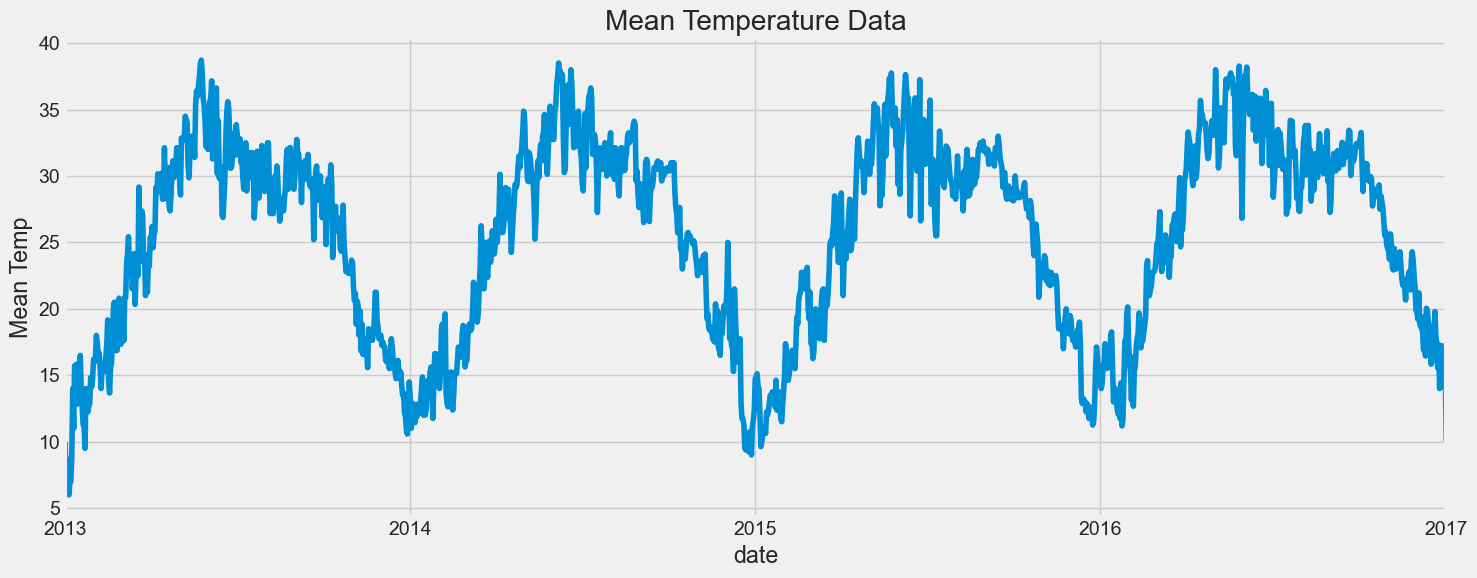

In [9]:
plt.figure(figsize=(15, 6))
df['meantemp'].plot()
plt.ylabel('Mean Temp')
plt.xlabel('date')
plt.title("Mean Temperature Data")
plt.tight_layout()
plt.show()

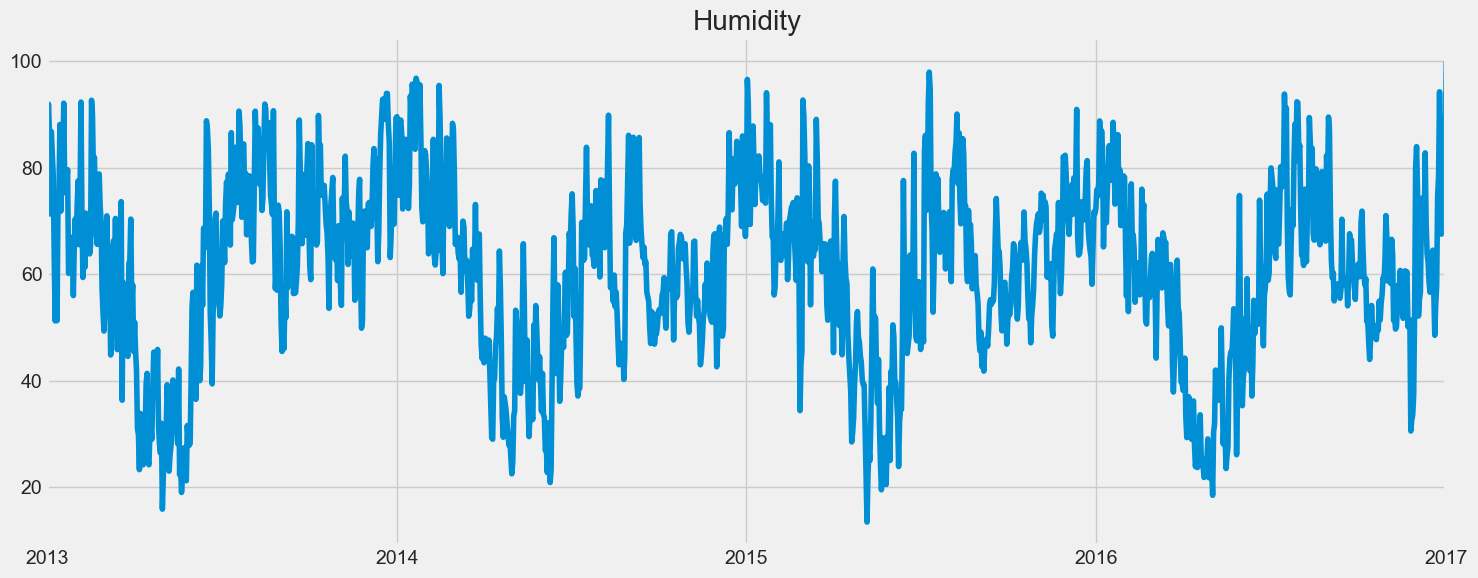

In [10]:
plt.figure(figsize=(15, 6))
df['humidity'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Humidity")
plt.tight_layout()
plt.show()

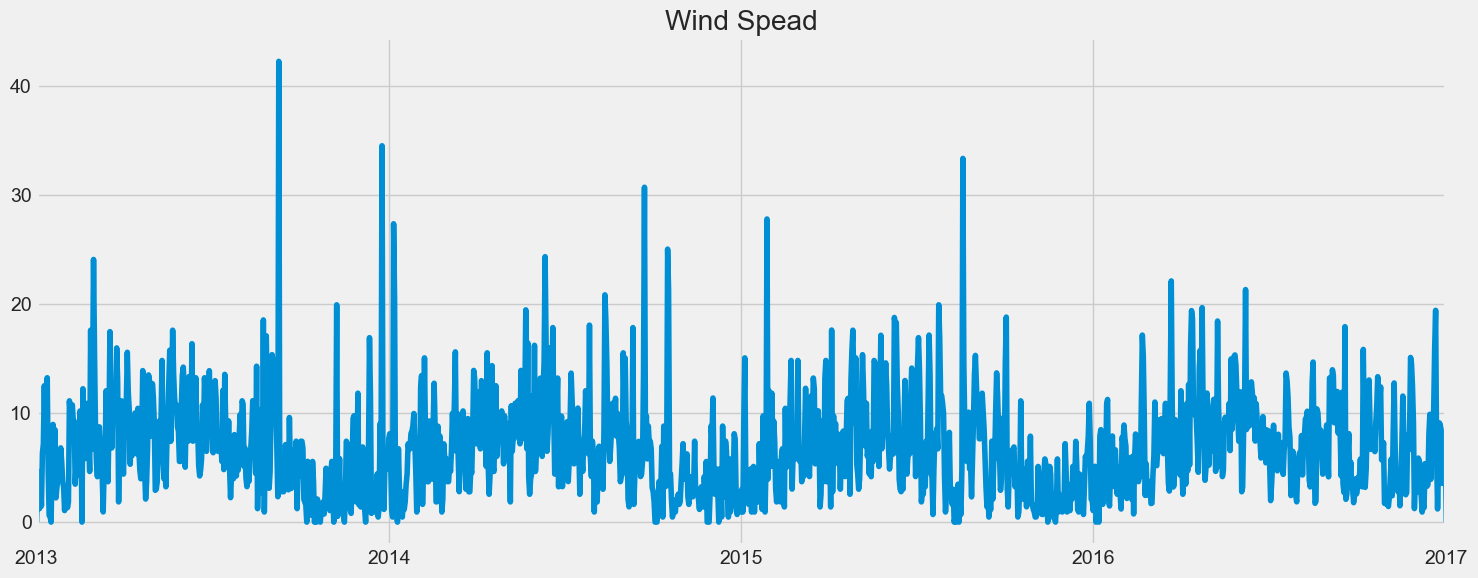

In [11]:
plt.figure(figsize=(15, 6))
df['wind_speed'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Wind Spead")
plt.tight_layout()
plt.show()

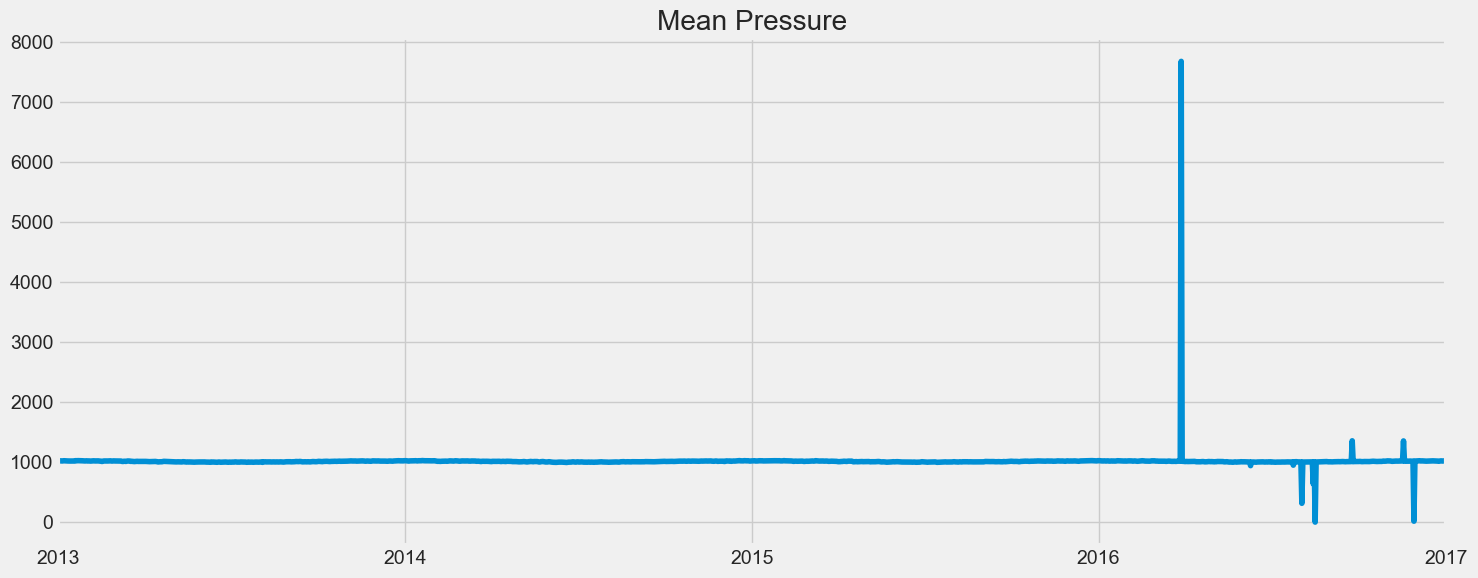

In [12]:
plt.figure(figsize=(15, 6))
df['meanpressure'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Mean Pressure")
plt.tight_layout()
plt.show()

# Data Preprocessing

### Choosing Prediction Column

In [13]:
dataset = df["meantemp"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1462, 1)

### Normalizing Data

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

### Splitting Data

In [15]:
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)



Train Size : 1169 Test Size : 293


### Creating training set

In [16]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.12227074],
       [0.04279476],
       [0.0356623 ],
       [0.08151383],
       [0.        ],
       [0.03056769],
       [0.03056769],
       [0.08733624],
       [0.24454148],
       [0.15283843],
       [0.29694323],
       [0.24454148],
       [0.30058224],
       [0.20887918],
       [0.26637555],
       [0.23944687],
       [0.3209607 ],
       [0.23944687],
       [0.19868996],
       [0.16157205],
       [0.15895197],
       [0.1069869 ],
       [0.24454148],
       [0.23944687],
       [0.19104803],
       [0.20378457],
       [0.20960699],
       [0.27001456],
       [0.24836245],
       [0.26637555],
       [0.31179039],
       [0.30567686],
       [0.31441048],
       [0.36681223],
       [0.34934498],
       [0.32478166],
       [0.32605531],
       [0.29344978],
       [0.24454148],
       [0.28820961],
       [0.28275109],
       [0.3018559 ],
       [0.2852984 ],
       [0.31441048],
       [0.34643377],
       [0.40247453],
       [0.25764192],
  

In [17]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train.shape,y_train.shape

((1402, 60, 1), (1402, 1))

In [19]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [20]:
x_train.shape , y_train.shape

((1402, 60, 1), (1402, 1))

# LSTM Model

### Model Structure

In [21]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [23]:
# Fitting the LSTM to the Training set
history = model.fit(x_train, y_train, epochs= 50, batch_size= 32)

Epoch 1/50
44/44 [==============================] - 11s 75ms/step - loss: 0.0456 - mean_absolute_error: 0.1453
Epoch 2/50
44/44 [==============================] - 3s 74ms/step - loss: 0.0064 - mean_absolute_error: 0.0638
Epoch 3/50
44/44 [==============================] - 3s 66ms/step - loss: 0.0050 - mean_absolute_error: 0.0561
Epoch 4/50
44/44 [==============================] - 3s 66ms/step - loss: 0.0049 - mean_absolute_error: 0.0550
Epoch 5/50
44/44 [==============================] - 3s 76ms/step - loss: 0.0051 - mean_absolute_error: 0.0567
Epoch 6/50
44/44 [==============================] - 3s 78ms/step - loss: 0.0047 - mean_absolute_error: 0.0541
Epoch 7/50
44/44 [==============================] - 3s 76ms/step - loss: 0.0046 - mean_absolute_error: 0.0528
Epoch 8/50
44/44 [==============================] - 3s 78ms/step - loss: 0.0045 - mean_absolute_error: 0.0527
Epoch 9/50
44/44 [==============================] - 3s 75ms/step - loss: 0.0044 - mean_absolute_error: 0.0513
Epoch 10/

### Model Evaluation

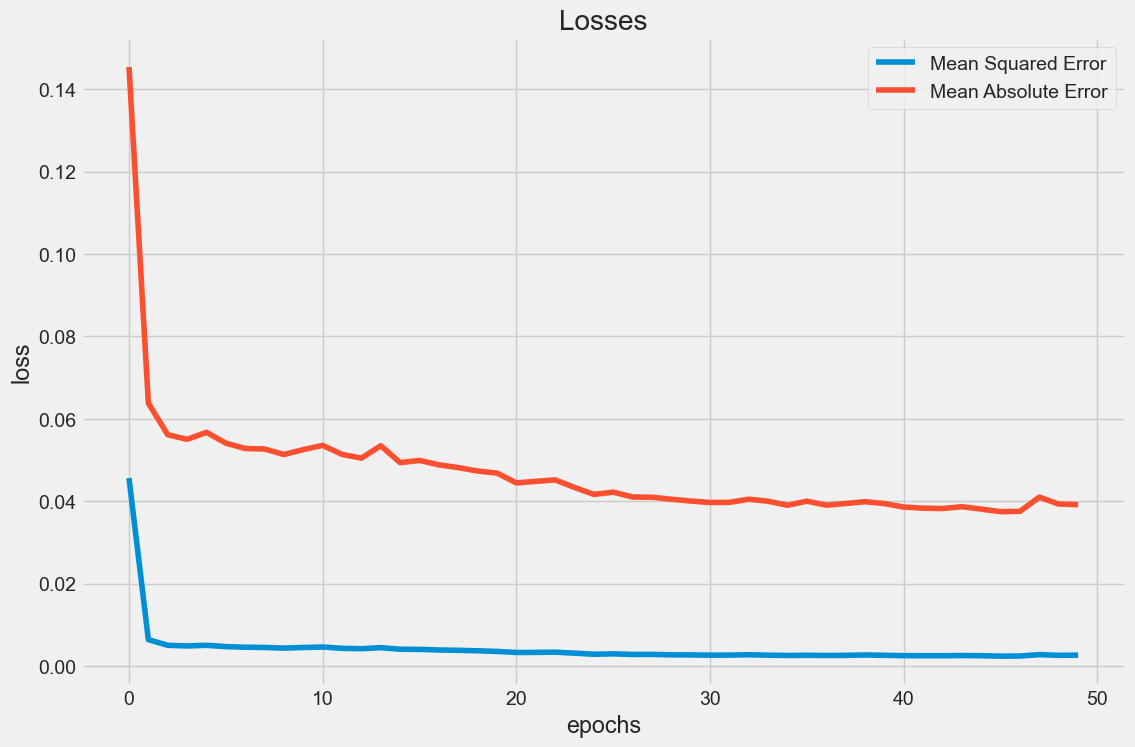

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Prediction

### Creating testing set

In [25]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [26]:
# Get Prediction
predictions = model.predict(x_test)

10/10 [==============================] - 2s 32ms/step


In [27]:
predictions.shape

(293, 1)

In [28]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(293, 1)

### Root mean square error

In [29]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [30]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

0.03

In [31]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,23.533989,24.066667
1,24.441605,23.937500
2,24.517878,26.312500
3,26.148304,26.187500
4,26.309797,26.785714
...,...,...
288,16.763309,17.217391
289,17.055748,15.238095
290,16.030237,14.095238
291,14.969384,15.052632


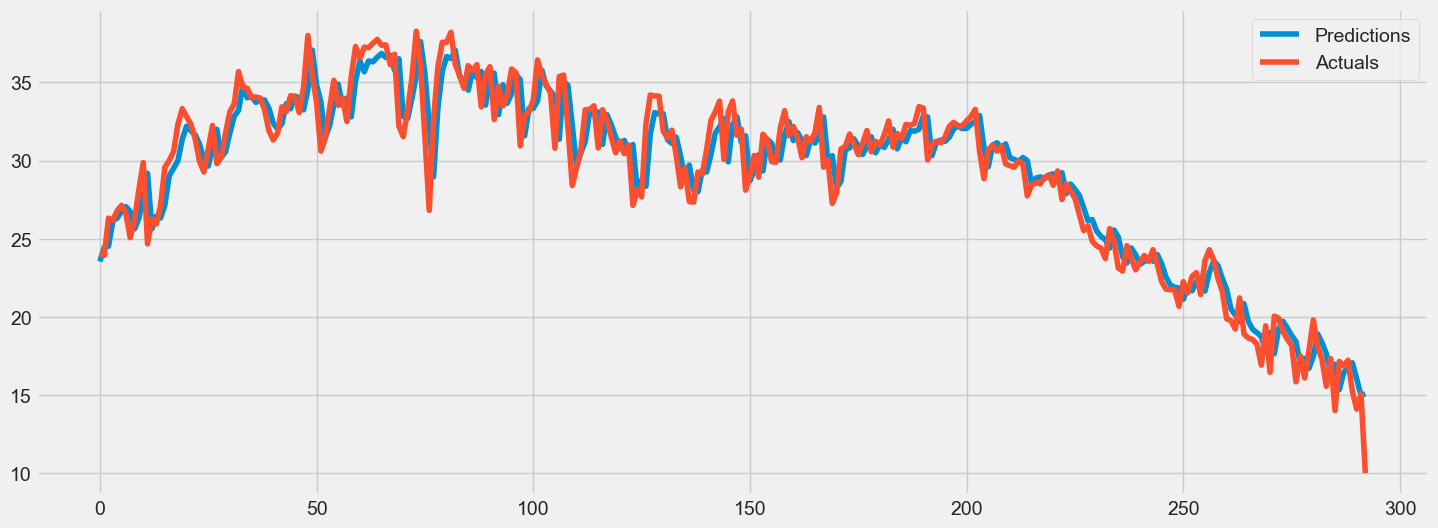

In [32]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

### Visualize Predictions with The Data
for one feature

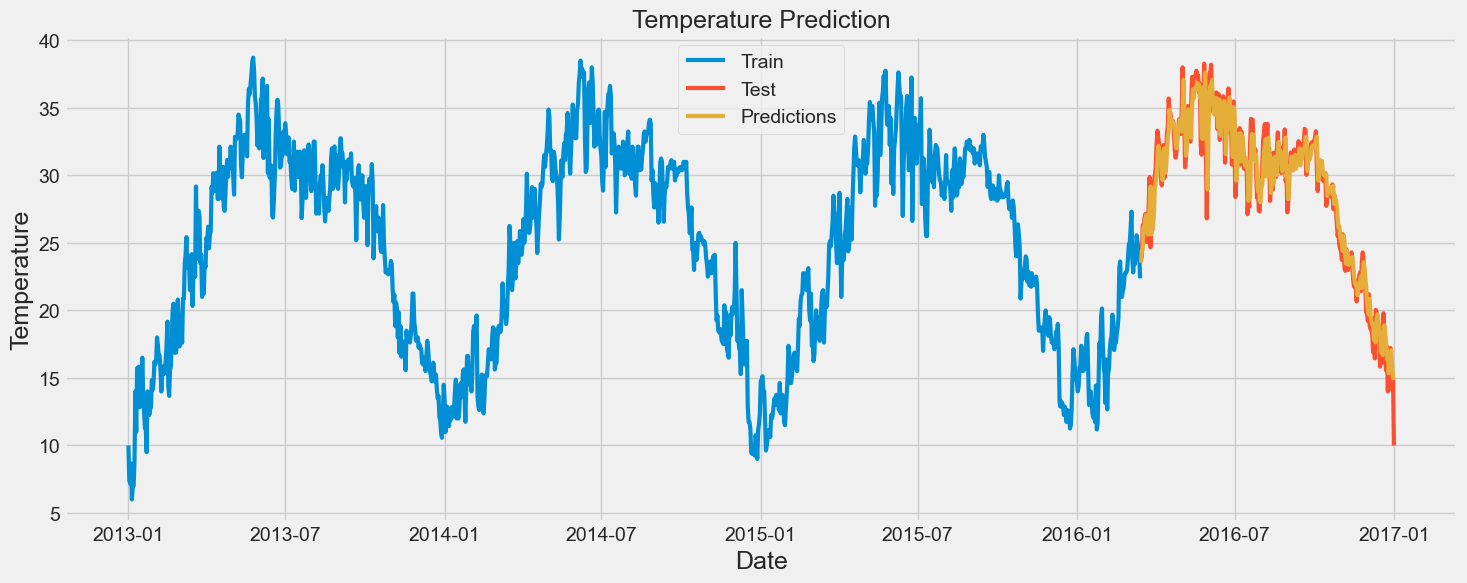

In [33]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Temperature Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Temperature', fontsize= 18)
plt.plot(train['meantemp'], linewidth= 3)
plt.plot(test['meantemp'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])
plt.show();

# Multivariate Prediction

In [34]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


### Chose Columns

In [35]:
n_cols = 4
# date	meantemp	humidity	wind_speed	meanpressure
cols = list(df.loc[:, ['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
dataset = df[cols]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1462, 4)

## Data Preprocessing

### Data Normalization

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

### Data Splitting

In [37]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 1096 Test Size : 366


In [38]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1096, 4)

### Creating Train Data

In [39]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 4

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.12227074, 0.8209571 , 0.        , 0.13260331],
       [0.04279476, 0.90759076, 0.07058266, 0.132881  ],
       [0.0356623 , 0.84983498, 0.10974262, 0.13299381],
       [0.08151383, 0.66886689, 0.02921206, 0.13279856],
       [0.        , 0.84790979, 0.08763619, 0.13271178],
       [0.03056769, 0.80132013, 0.03505448, 0.13290703],
       [0.03056769, 0.75280528, 0.14921838, 0.13316737],
       [0.08733624, 0.58085809, 0.16918184, 0.13300001],
       [0.24454148, 0.43688119, 0.29606821, 0.13277686],
       [0.15283843, 0.56105611, 0.17527238, 0.13260331],
       [0.29694323, 0.43729373, 0.25038912, 0.13266529],
       [0.24454148, 0.69966997, 0.31332476, 0.13259091],
       [0.30058224, 0.71314631, 0.10974262, 0.13229958],
       [0.20887918, 0.86331133, 0.01460603, 0.13253822],
       [0.26637555, 0.67491749, 0.01251946, 0.1326281 ],
       [0.23944687, 0.8459846 , 0.        , 0.13273348],
       [0.3209607 , 0.77860286, 0.12434865, 0.132625  ],
       [0.23944687, 

In [40]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [41]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))
x_train.shape , y_train.shape

((1036, 60, 4), (1036, 4))

## Model Structure

In [42]:
model2 = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model2.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [43]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            11000     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 43,116
Trainable params: 43,116
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [44]:
# Fitting the LSTM to the Training set
history2 = model2.fit(x_train, y_train, epochs= 50, batch_size= 32)

Epoch 1/50
33/33 [==============================] - 10s 74ms/step - loss: 0.0328 - mean_absolute_error: 0.1233
Epoch 2/50
33/33 [==============================] - 2s 75ms/step - loss: 0.0088 - mean_absolute_error: 0.0651
Epoch 3/50
33/33 [==============================] - 2s 75ms/step - loss: 0.0082 - mean_absolute_error: 0.0616
Epoch 4/50
33/33 [==============================] - 2s 74ms/step - loss: 0.0080 - mean_absolute_error: 0.0609
Epoch 5/50
33/33 [==============================] - 3s 77ms/step - loss: 0.0080 - mean_absolute_error: 0.0599
Epoch 6/50
33/33 [==============================] - 2s 76ms/step - loss: 0.0082 - mean_absolute_error: 0.0615
Epoch 7/50
33/33 [==============================] - 3s 76ms/step - loss: 0.0074 - mean_absolute_error: 0.0574
Epoch 8/50
33/33 [==============================] - 3s 76ms/step - loss: 0.0075 - mean_absolute_error: 0.0572
Epoch 9/50
33/33 [==============================] - 2s 74ms/step - loss: 0.0076 - mean_absolute_error: 0.0585
Epoch 10/

### Model Evaluation

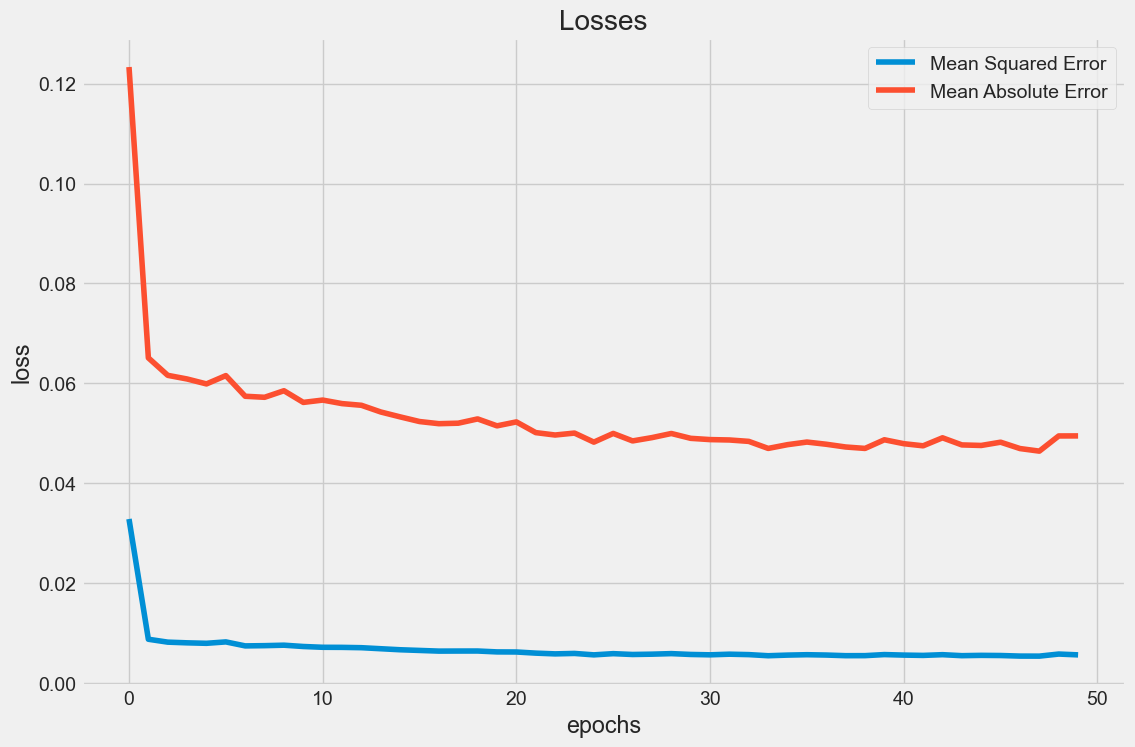

In [45]:
plt.figure(figsize=(12, 8))
plt.plot(history2.history["loss"])
plt.plot(history2.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Prediction


### Creating Test Data

In [46]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 4

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [47]:
x_test.shape , y_test.shape

((366, 60, 4), (366, 4))

In [48]:
# Get Prediction
predictions = model2.predict(x_test)

12/12 [==============================] - 2s 29ms/step


In [49]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [50]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

277.78

In [51]:
# This is great work